#### Linear regression in multivariate using custum method and sklearn
- Data import
- Data preprocessing
- Data visulization (Not in this case)
- model
- Accuracy

In [6]:
### Data import
import pandas as pd

data_Uncleaned_df = pd.read_csv('Train.csv')
print(data_Uncleaned_df.head(n = 10))

data_Uncleaned = data_Uncleaned_df.values

   feature_1  feature_2  feature_3  feature_4  feature_5      target
0   0.293416  -0.945599  -0.421105   0.406816   0.525662  -82.154667
1  -0.836084  -0.189228  -0.776403  -1.053831   0.597997  -48.897960
2   0.236425   0.132836  -0.147723   0.699854  -0.187364   77.270371
3   0.175312   0.143194  -0.581111  -0.122107  -1.292168   -2.988581
4  -1.693011   0.542712  -2.798729  -0.686723   1.244077  -37.596722
5  -1.055329  -0.874807   0.580753  -0.773541   1.070888 -122.405263
6  -0.824707   0.499427   1.293281  -0.240671  -0.419136    1.413741
7  -1.936602   0.583708  -0.521135  -0.631724  -1.030729  -13.306543
8   0.647431  -0.265401   0.327080   0.457829  -1.757592  -25.754698
9  -1.133029  -0.839132  -0.547809   0.551768  -0.639173  -57.077754


In [8]:
### Extracting the target value

data_Y = data_Uncleaned[:,-1:]
data_X = data_Uncleaned[:,:-1]

In [16]:
### Statistical data analysis

print("The mean of the data is {}".format(data_X.mean()))
print("The std of the data is {}".format(data_X.std()))

The mean of the data is -0.01967029980670414
The std of the data is 1.005427543067447


In [29]:
#### Add the one in the front for the
# h(x) = theta0*xi0 + theta0*xi0 + theta0*xi0 ... thetan*xin
## where xi0 is 1

import numpy as np
X_ones = np.ones((data_X.shape[0],1))
data_X = np.hstack((X_ones,data_X))

In [30]:
### Dividing the data for the train and test

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(data_X,data_Y,test_size=0.2)

print("The size of X_Train is {}".format(X_Train.shape))
print("The size of X_Test is {}".format(X_Test.shape))
print("The size of Y_Train is {}".format(Y_Train.shape))
print("The size of Y_Test is {}".format(Y_Test.shape))

The size of X_Train is (1280, 6)
The size of X_Test is (320, 6)
The size of Y_Train is (1280, 1)
The size of Y_Test is (320, 1)


In [61]:
### model 
"""Written by deepanshu garg"""

def hypothesis(x,theta):
    """Function return the prediction"""
    return np.dot(x.T,theta)

def error(x,y,theta):
    """Function return the error on the current theta values"""
    loss = 0.0
    for i in range(x.shape[0]):
        loss += (hypothesis(x[i],theta) - y[i])**2
    return loss/x.shape[0]

def grad(x,y,theta):
    """Function implement the differential part of the gradient descent"""
    grad_Values = np.zeros((x.shape[1],))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            grad_Values[j] += (hypothesis(x[i],theta) - y[i])*x[i][j]
    return grad_Values/x.shape[0]

def gradientDescent(x,y,iterations = 300,learning_rate = 0.1):
    """Function implement the gradient descent"""
    theta = np.zeros((x.shape[1],))
    currItr = 0
    errorValues = []
    while currItr < iterations:
        gradValues = grad(x,y,theta)
        errorValues.append(error(x,y,theta))
        theta = theta - learning_rate*gradValues
        currItr += 1
    return theta,errorValues

In [67]:
theta,errorValues = gradientDescent(X_Train,Y_Train,iterations = 300)

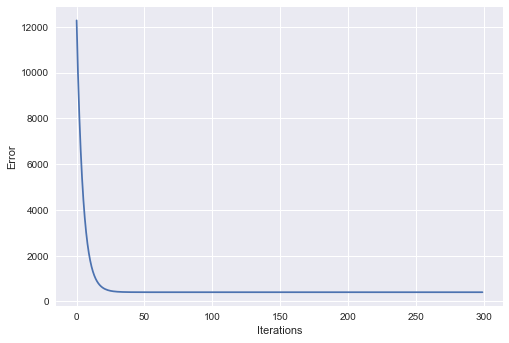

In [68]:
### Visulizing the error graph

import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.plot(errorValues)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

In [69]:
### Predictions
y_pred = []
for i in range(X_Test.shape[0]):
    y_pred.append(hypothesis(X_Test[i],theta))
print(y_pred[:5])
print(Y_Test[:5])

[-102.196864220684, -41.57881934683342, 149.44732329785927, 83.29541564906656, 64.9628945742891]
[[-122.27607552]
 [ -57.82408801]
 [ 138.17825366]
 [  77.3834247 ]
 [  68.01173246]]


In [77]:
### Using the sklearn

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data_X,data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lr.score(data_X,data_Y)

0.9660939669975616